## How to travel between N Russian cities and return to the starting point using the shortest route? Let's find out!

## 2-opt is a simple local search algorithm first proposed by Croes in 1958 for solving the traveling salesman problem. The main idea behind it is to take a route that crosses over itself and reorder it so that it does not. 
### It is very easy to implement and result visualization is cool.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.animation import FuncAnimation

from math import sin, cos, atan2, sqrt, radians

%matplotlib inline

In [7]:
# download russian towns dataset from GeoNames Data - it is free and has data for every country!
from urllib.request import urlretrieve
urlretrieve ("http://download.geonames.org/export/dump/RU.zip", "./data/RU.zip")

('./data/RU.zip', <http.client.HTTPMessage at 0x7fca2c402240>)

In [11]:
from zipfile import ZipFile
with ZipFile("./data/RU.zip","r") as zip_ref:
    zip_ref.extractall("./data/RU")

In [151]:
towns = pd.read_csv("./data/RU/RU.txt", sep='\t', index_col='name', names=['name', 'latitude', 'longitude', 'feature_class', 'feature_code', 'population', ], 
                    usecols=[1,4,5,6,7,14])
towns.head(3)
# here are some unknown small villages, get rid of them!

,latitude,longitude,feature_class,feature_code,population
name,,,,,
Zyabrikovo,56.84665,34.70480,P,PPL,0
Znamenka,56.74087,34.02323,P,PPL,0
Zhukovo,57.26429,34.20956,P,PPL,0


In [152]:
N = 20
towns = towns[towns.feature_code == 'PPLA'] # leave only first-order administrative cities
towns = towns[towns.population > 500000]
towns = towns.sample(N)
towns

,latitude,longitude,feature_class,feature_code,population
name,,,,,
Irkutsk,52.29778,104.29639,P,PPLA,586695
Kazan,55.78874,49.12214,P,PPLA,1104738
Saratov,51.54056,46.00861,P,PPLA,863725
Volgograd,48.71939,44.50183,P,PPLA,1011417
Voronezh,51.67204,39.18430,P,PPLA,848752
Omsk,54.99244,73.36859,P,PPLA,1129281
Saint Petersburg,59.93863,30.31413,P,PPLA,5028000
Astrakhan,46.34968,48.04076,P,PPLA,502533
Lipetsk,52.60311,39.57076,P,PPLA,515655


In [153]:
# compute NxN distance matrix. Can't use simple euclidean distance, do some math magic:
distances = np.zeros((N, N))
R = 6373 # Earth radius in kilometers
for i in range(N):
    for j in range(N):
        lat1, lon1 = towns.iloc[i][['latitude', 'longitude']]
        lat2, lon2 = towns.iloc[j][['latitude', 'longitude']]
        lat1, lon1, lat2, lon2 = radians(lat1), radians(lon1), radians(lat2), radians(lon2)
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (sin(dlat / 2)) ** 2 + cos(lat1) * cos(lat2) * (sin(dlon / 2)) ** 2 
        c = 2 * atan2(sqrt(a), sqrt(1 - a)) 
        d = R * c
        
        distances[i, j] = distances[j, i] = d

In [154]:
distances = pd.DataFrame(data=distances, index=towns.index.values, columns=towns.index.values)
distances

,Irkutsk,Kazan,Saratov,Volgograd,Voronezh,Omsk,Saint Petersburg,Astrakhan,Lipetsk,Chelyabinsk,Krasnoyarsk,Perm,Nizhniy Novgorod,Rostov-na-Donu,Izhevsk,Ulyanovsk,Khabarovsk,Ufa,Krasnodar,Yekaterinburg
Irkutsk,0.000000,3527.782205,3889.311488,4126.825527,4306.055703,2043.919331,4416.751728,4026.370846,4235.683236,2793.849888,850.215396,3050.074080,3810.828009,4517.395360,3253.874815,3623.935473,2206.567858,3143.759178,4698.490318,2811.378569
Kazan,3527.782205,0.000000,515.026121,846.456077,797.113808,1526.504966,1199.503054,1052.587690,714.548562,778.087645,2681.757476,498.179664,323.521503,1150.755188,278.040564,169.072107,5539.356170,448.955035,1391.496159,717.643116
Saratov,3889.311488,515.026121,0.000000,331.662071,471.482302,1847.546577,1349.570245,596.097021,455.571523,1097.115784,3058.590556,972.429480,548.487315,660.483265,752.826804,348.607245,5965.501930,752.976247,889.557594,1115.543586
Volgograd,4126.825527,846.456077,331.662071,0.000000,500.997980,2084.501303,1543.627622,374.227346,554.255103,1358.433740,3309.893497,1290.777117,847.048417,392.341729,1075.454018,679.076915,6236.202306,1033.546874,585.831037,1405.590878
Voronezh,4306.055703,797.113808,471.482302,500.997980,0.000000,2276.877523,1071.682025,875.217502,106.870169,1517.575520,3465.139608,1295.149335,605.876664,495.468461,1074.621814,682.490831,6336.385750,1165.819521,737.302191,1498.692965
Omsk,2043.919331,1526.504966,1847.546577,2084.501303,2276.877523,0.000000,2584.535371,2011.940526,2214.187358,759.616195,1229.416374,1099.703856,1834.465077,2474.150122,1268.799802,1600.419835,4169.811419,1111.277510,2660.693781,820.147206
Saint Petersburg,4416.751728,1199.503054,1349.570245,1543.627622,1071.682025,2584.535371,0.000000,1906.440394,994.308080,1911.870186,3575.178763,1492.396544,896.227621,1540.413319,1370.212800,1250.906981,6196.531949,1632.045033,1753.938313,1782.568403
Astrakhan,4026.370846,1052.587690,596.097021,374.227346,875.217502,2011.940526,1906.440394,0.000000,925.337212,1354.516407,3238.759251,1410.305918,1144.384466,640.648909,1220.331175,887.790446,6181.216045,1087.279567,718.594382,1450.826733
Lipetsk,4235.683236,714.548562,455.571523,554.255103,106.870169,2214.187358,994.308080,925.337212,0.000000,1454.711886,3392.209730,1210.582264,503.544013,597.599429,992.555460,613.984416,6252.067572,1103.592143,841.824419,1424.926822
Chelyabinsk,2793.849888,778.087645,1097.115784,1358.433740,1517.575520,759.616195,1911.870186,1354.516407,1454.711886,0.000000,1961.525005,448.761486,1095.984394,1740.337782,544.790165,841.233367,4878.106240,351.763895,1943.251586,195.566663


In [162]:
# generate random Hamiltonian cycle for towns (graph cycle that visits each node exactly once)
path = np.random.permutation(towns.index.values)
path = np.append(path, path[0])
path

array(['Chelyabinsk', 'Yekaterinburg', 'Ufa', 'Krasnoyarsk', 'Lipetsk',
       'Kazan', 'Voronezh', 'Omsk', 'Khabarovsk', 'Izhevsk',
       'Nizhniy Novgorod', 'Ulyanovsk', 'Saratov', 'Irkutsk',
       'Saint Petersburg', 'Astrakhan', 'Volgograd', 'Perm', 'Krasnodar',
       'Rostov-na-Donu', 'Chelyabinsk'], dtype=object)

In [156]:
def make_russian_map():
    llcrnrlat, llcrnrlon = 41, 23
    urcrnrlat, urcrnrlon = 77, 169

    map = Basemap(projection='mill',llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,\
                llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution='c')

    map.drawcoastlines(linewidth=0.1)
    map.drawcountries(linewidth=0.2)
    map.drawstates()
    map.fillcontinents(color='#b0c9f2',lake_color='#fce3f8')
    map.drawmapboundary(fill_color='#fce3f8')
    
    return map

In [157]:
def plot_path(path):
    map = make_russian_map()

    lons, lats = [], []
    for city in path:
        lat, lon = towns.loc[city][['latitude', 'longitude']]
        lats.append(lat)
        lons.append(lon)
    
    map.scatter(lons, lats, latlon=True, color='r', s=5, zorder=10)
    lines = map.plot(lons, lats, latlon=True, color='b', zorder=15)

    plt.show()

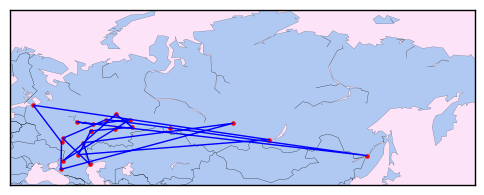

In [158]:
# draw out random path
plot_path(path)

### Untangle this mess with 2-opt technique!

In [159]:
def swap(path, m, n):
    assert m < n
    path[m : n+1] = path[m : n+1][::-1]

# generator function that for each iteration finds a pair of edges to untangle and does a 2-opt swap.
def optimize_step():
    improve = True
    while improve:
        improve = False
        for i in range(1, len(path)-1):
            for j in range(i+1, len(path)-1):
                cityA, cityB = path[i-1], path[i]
                cityC, cityD = path[j], path[j+1]
                old_distance = distances.loc[cityA, cityB] + distances.loc[cityC, cityD]
                new_distance = distances.loc[cityA, cityC] + distances.loc[cityB, cityD]

                if new_distance < old_distance:
                    swap(path, i, j)
                    improve = True
                    yield path

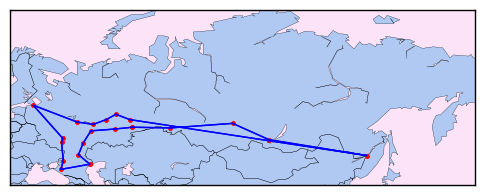

In [163]:
map = make_russian_map()

lats, lons = [], []
for city in path:
    lat, lon = towns.loc[city][['latitude', 'longitude']]
    lats.append(lat)
    lons.append(lon)

lons, lats = map(lons, lats)

map.scatter(lons, lats, latlon=False, color='r', s=5, zorder=10)
lines, = map.plot(lons, lats, latlon=False, zorder=10)

# animation function.  This is called sequentially
def animate(new_path):    
    lats, lons = [], []
    for city in new_path:
        lat, lon = towns.loc[city][['latitude', 'longitude']]
        lats.append(lat)
        lons.append(lon)
    lons,lats = map(lons, lats)
    lines.set_data(lons, lats)
    return lines,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(plt.gcf(), animate, frames=optimize_step, interval=500, blit=True)
# save animation as gif
anim.save('./result.gif', writer='imagemagick', fps=3)

plot_path(path)